# With Valid Stocks and 2 years of data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

from mymodule.DatabaseConnection import CRUD
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import importlib
import mymodule.DatabaseConnection  # first import
importlib.reload(mymodule.DatabaseConnection) 

<module 'mymodule.DatabaseConnection' from 'c:\\Projects\\Market\\mymodule\\DatabaseConnection.py'>

In [3]:
lo_stock = CRUD('v_stockdailyupdate')
df_stocks = lo_stock.Read()
df_stocks.dropna(subset=['SectorId'],inplace=True)
df_stocks = df_stocks[df_stocks['BlackListed'].isna()]
df_stocks['Date'] = pd.to_datetime(df_stocks['Date'])

df_stocks = df_stocks.sort_values('Date')
df_stocks["5DMA"]   = df_stocks["close"].rolling(5).mean()
df_stocks["20DMA"]  = df_stocks["close"].rolling(20).mean()
df_stocks["50DMA"]  = df_stocks["close"].rolling(50).mean()
df_stocks["100DMA"] = df_stocks["close"].rolling(100).mean()
df_stocks["200DMA"] = df_stocks["close"].rolling(200).mean()

df_stocks = df_stocks[df_stocks['Date'] >= '20231201']
df_stocks = df_stocks[df_stocks['Date'] < '20251201']

In [4]:
df_count = pd.DataFrame(data=df_stocks[df_stocks['Date'] >= '20231201']['ISIN'].value_counts().reset_index())
df_count.columns = ['ISIN', 'COUNT']
df_valid = df_count[df_count['COUNT']==493]
df_stocks = df_stocks.merge(df_valid, how='inner', on='ISIN')

df_stocks = df_stocks.sort_values(by=['ISIN','Date']).reset_index()
df_stocks = df_stocks[['Date','ISIN','SectorId','open','high','low','close','volume','5DMA']]

le = LabelEncoder()
ISIN = le.fit_transform(df_stocks['ISIN'], )

In [5]:
features = ['open', 'high', 'low', 'close', 'volume'] #, '5DMA'] #, '20DMA', '50DMA', '100DMA', '200DMA'] #, 'RSI', ]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_stocks[features])

scaled_df = pd.DataFrame(scaled_data, columns=features, index=df_stocks.index)
scaled_df['ISIN'] = ISIN
scaled_df['SectorId'] = df_stocks['SectorId']

scaled_df.sample(10)

,open,high,low,close,volume,ISIN,SectorId
597584,0.000811,0.000829,0.000763,0.000764,0.000032,1212,3.0
57295,0.000324,0.000320,0.000308,0.000311,0.010736,116,6.0
820497,0.015288,0.015136,0.014816,0.014927,0.000003,1664,7.0
124123,0.008679,0.008684,0.008729,0.008636,0.004033,251,6.0
529053,0.000750,0.000796,0.000758,0.000773,0.001322,1073,4.0
635316,0.000043,0.000048,0.000043,0.000048,0.000077,1288,8.0
123978,0.007679,0.007688,0.007694,0.007684,0.005678,251,6.0
442824,0.008378,0.008295,0.008040,0.008116,0.000040,898,10.0
80748,0.002607,0.002651,0.002627,0.002621,0.000470,163,3.0
270939,0.000624,0.000627,0.000624,0.000627,0.005488,549,8.0


# Added Stocks Differently

In [66]:
scaled_df[491:495]

,open,high,low,close,volume,5DMA,ISIN,SectorId
491,0.000182,0.000180,0.000178,0.000177,5.111987e-06,0.006421,0,8.0
492,0.000177,0.000176,0.000176,0.000175,2.211671e-06,0.005959,0,8.0
493,0.000038,0.000038,0.000039,0.000038,0.000000e+00,0.013214,1,3.0
494,0.000036,0.000036,0.000037,0.000036,6.689363e-08,0.025420,1,3.0


In [6]:
lookback = 60
X, y = [], []
for a in range(scaled_df['ISIN'].nunique()):
    print('Stock : ',a+1)
    scaled_df1 = scaled_df[a*493:(a+1)*493]
    scaled_df1.reset_index(inplace=True)
    scaled_df1 = scaled_df1.drop(columns=['index'],axis=1)
    for i in range(lookback, len(scaled_df1)):
        X.append(scaled_df1.iloc[i-lookback:i].values)
        y.append(scaled_df1.iloc[i]['close'])

X, y = np.array(X), np.array(y)

print("X shape:", X.shape)  # (samples, timesteps=60, features)
print("y shape:", y.shape)  # (samples,)

Stock :  1
Stock :  2
Stock :  3
Stock :  4
Stock :  5
Stock :  6
Stock :  7
Stock :  8
Stock :  9
Stock :  10
Stock :  11
Stock :  12
Stock :  13
Stock :  14
Stock :  15
Stock :  16
Stock :  17
Stock :  18
Stock :  19
Stock :  20
Stock :  21
Stock :  22
Stock :  23
Stock :  24
Stock :  25
Stock :  26
Stock :  27
Stock :  28
Stock :  29
Stock :  30
Stock :  31
Stock :  32
Stock :  33
Stock :  34
Stock :  35
Stock :  36
Stock :  37
Stock :  38
Stock :  39
Stock :  40
Stock :  41
Stock :  42
Stock :  43
Stock :  44
Stock :  45
Stock :  46
Stock :  47
Stock :  48
Stock :  49
Stock :  50
Stock :  51
Stock :  52
Stock :  53
Stock :  54
Stock :  55
Stock :  56
Stock :  57
Stock :  58
Stock :  59
Stock :  60
Stock :  61
Stock :  62
Stock :  63
Stock :  64
Stock :  65
Stock :  66
Stock :  67
Stock :  68
Stock :  69
Stock :  70
Stock :  71
Stock :  72
Stock :  73
Stock :  74
Stock :  75
Stock :  76
Stock :  77
Stock :  78
Stock :  79
Stock :  80
Stock :  81
Stock :  82
Stock :  83
Stock :  84
S

In [7]:
df_stocks[df_stocks['volume']==0]['ISIN'].nunique()

1788

In [8]:
scaled_df

,open,high,low,close,volume,ISIN,SectorId
0,0.000226,0.000224,0.000222,0.000221,0.000030,0,8.0
1,0.000227,0.000227,0.000219,0.000218,0.000037,0,8.0
2,0.000226,0.000224,0.000217,0.000215,0.000017,0,8.0
3,0.000215,0.000220,0.000211,0.000212,0.000016,0,8.0
4,0.000214,0.000213,0.000210,0.000212,0.000010,0,8.0
...,...,...,...,...,...,...,...
893804,0.000081,0.000080,0.000079,0.000078,0.001269,1812,11.0
893805,0.000078,0.000080,0.000078,0.000078,0.001168,1812,11.0
893806,0.000078,0.000078,0.000079,0.000078,0.001006,1812,11.0
893807,0.000079,0.000078,0.000079,0.000078,0.000660,1812,11.0


In [9]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [10]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output (predicting next-day price)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

c:\Projects\Market\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,393 (122.63 KB)

 Trainable params: 31,393 (122.63 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 465s 26ms/step - loss: 2.7489e-04 - val_loss: 5.3249e-04
Epoch 2/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 589s 33ms/step - loss: 2.1015e-04 - val_loss: 5.2744e-04
Epoch 3/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 615s 35ms/step - loss: 2.1012e-04 - val_loss: 5.2812e-04
Epoch 4/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 840s 48ms/step - loss: 2.1020e-04 - val_loss: 5.2710e-04
Epoch 5/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 1069s 60ms/step - loss: 2.1012e-04 - val_loss: 5.2674e-04
Epoch 6/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 1253s 69ms/step - loss: 2.1014e-04 - val_loss: 5.2633e-04
Epoch 7/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 1385s 78ms/step - loss: 2.1010e-04 - val_loss: 5.3147e-04
Epoch 8/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 796s 45ms/step - loss: 2.1014e-04 - val_loss: 5.2697e-04
Epoch 9/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 984s 56ms/step - loss: 2.1018e-04 - val_loss: 5.3182e-04
Epoch 10/100
17664/17664 ━━━━━━━━━━━━━━━━━━━━ 716s 41ms/step - loss: 2.1011e-04

4907/4907 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step


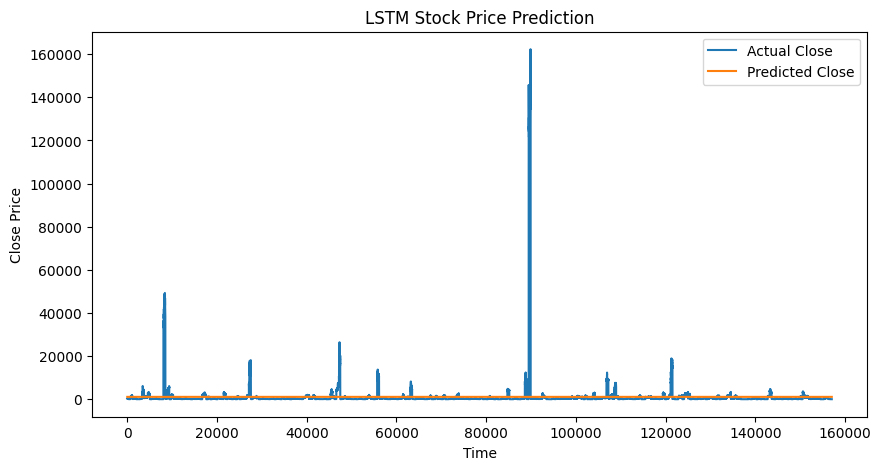

In [12]:
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Inverse scale for interpretability
close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[features.index('close')], scaler.scale_[features.index('close')]
y_test_inv = y_test / close_scaler.scale_ - close_scaler.min_ / close_scaler.scale_
y_pred_inv = y_pred / close_scaler.scale_ - close_scaler.min_ / close_scaler.scale_

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual Close')
plt.plot(y_pred_inv, label='Predicted Close')
plt.title('LSTM Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

MSE : 56537943.9801
RMSE: 7519.1718
MAE : 1506.6360
R²  : -0.0000
